In [2]:
%pip install -q --extra-index-url https://download.pytorch.org/whl/cpu gradio "openvino>=2023.1.0" "transformers[torch]>=4.30" "datasets" "nncf>=2.6.0"
# skip this step if already installed

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.34 requires rich~=13.4.2, but you have rich 13.7.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import CLIPProcessor, CLIPModel

# load pre-trained model
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
# load preprocessor for model input
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

In [2]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from urllib.request import urlretrieve
from pathlib import Path
def visualize_result(image:Image, labels:List[str], probs:np.ndarray, top:int = 5):
    plt.figure(figsize=(64, 64))
    top_labels = np.argsort(-probs)[:min(top, probs.shape[0])]
    top_probs = probs[top_labels]
    plt.subplot(8, 8, 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(8, 8, 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs)
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [labels[index] for index in top_labels])
    plt.xlabel("probability")

### Visualize the Results With Comprehensive Prompts ###

Unused or unrecognized kwargs: padding.


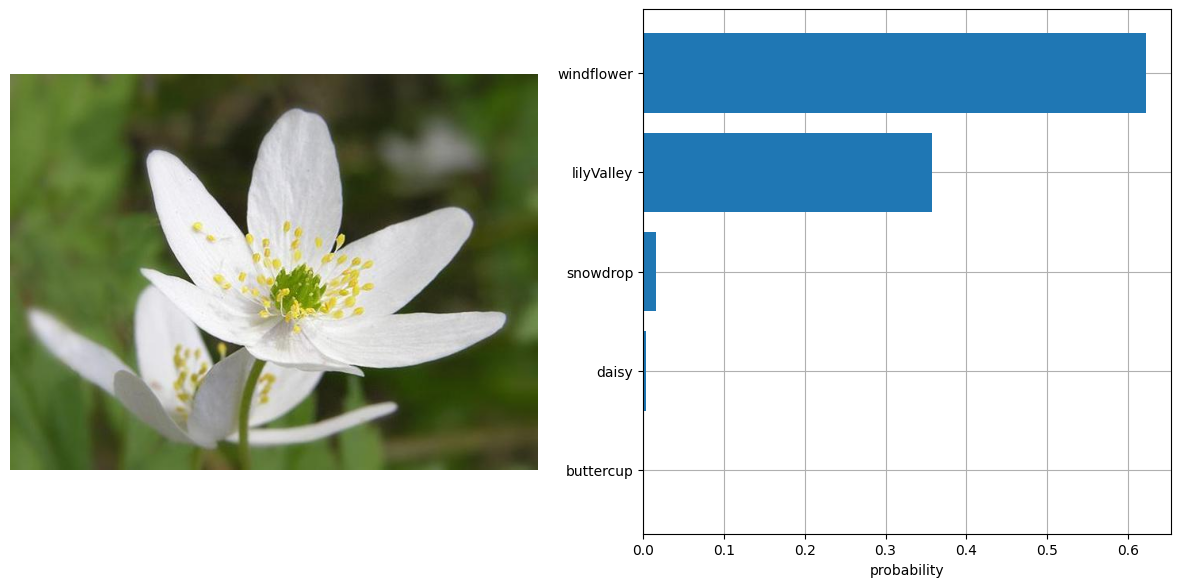

In [4]:
sample_path = Path("data/flower/image_1232.jpg") # use format like image_0001.jpg, image_0011.jpg, image_0111.jpg, and image_1111.jpg
sample_path.parent.mkdir(parents=True, exist_ok=True)
image = Image.open(sample_path)
input_labels = ['daffodil', 'snowdrop', 'lilyValley', 'bluebell', 'crocus', 'iris', 'tigerlily', 'tulip', 'fritillary', 'sunflower', 'daisy', 'colts foot', 'dandelion', 'cowslip', 'buttercup', 'windflower', 'pansy']
text_descriptions = ['This is a photo of a Daffodil, The daffodil showcases a large, showy flower with a vibrant yellow trumpet-shaped corona at the center and six white petals that surround it, creating a beautiful contrast.',
 'This is a photo of Snowdrop, The snowdrop displays exquisite, pendulous flowers with three white outer petals and three inner petals that form a bell-like shape, hanging gracefully from a slim stem.',
 'This is a photo of LilyValley, features delicate, bell-shaped flowers with small, white petals that dangle from a slender stalk, accompanied by glossy, dark green lanceolate leaves.',
 'This is a photo of Bluebell, presents a cluster of nodding, tubular flowers that are typically deep blue in color, each with six fused petals forming a bell-shaped structure.',
 'This is a photo of Crocus, reveals slender, goblet-shaped flowers with six petals that bloom in an array of colors, including purple, yellow, white, or striped varieties.',
 'This is a photo of Iris, showcases striking, intricate flowers with three upright petals called standards and three drooping petals called falls, often exhibiting a vibrant mix of colors and patterns.',
 'This is a photo of Tigerlily, boasts large, showy flowers with recurved orange petals covered in dark spots, resembling the coat of a tiger, while displaying prominent stamens and pistils.',
 'This is a photo of Tulip, a small, vibrant yellow flower with delicate, cup-shaped blooms. its smooth, silky petals create a striking contrast against the green foliage. The blooms unfurl to reveal intricate details, with a cluster of yellow-orange stamens at the center.',
 'This is a photo of Fritillary, presents bell-shaped flowers with distinctive patterns, such as checkered or spotted designs, in shades of purple, pink, or white, adding a touch of elegance and allure.',
 'This is a photo of Sunflower, exhibits a large, round flower head with bright yellow petals radiating from a dark brown center disk, creating a sun-like appearance and reaching impressive heights.',
 'This is a photo of Daisy, showcases a classic flower with a yellow center disk surrounded by white or yellow petals, exhibiting a simple and cheerful charm.',
 'This is a photo of Colts foot, displays bright yellow, daisy-like flowers with numerous narrow petals arranged in a dense cluster, emerging before the appearance of its large, hoof-shaped leaves.',
 'This is a photo of Dandelion, a common dandelion flower, characterized by its bright yellow, many-petaled, rosette shape. Each "petal" is actually an individual flower, collectively making up the dandelion\'s composite head. ',
 'This is a photo of Cowslip, features clusters of nodding, bell-shaped yellow flowers with orange or red spots on the inside, held by slender stems amidst a rosette of wrinkled, oval-shaped leaves.',
 'This is a photo of Buttercup, presents glossy, bright yellow flowers with five shiny petals and a cluster of yellow stamens in the center, radiating a joyful and vibrant aura.',
 'This is a photo of Wind flower, delicate, with white petals that radiate from the center. The center of the flower has a cluster of bright yellow stamens, surrounded by a ring of green. The texture of the petals appears to have a subtle veining pattern, contributing to its dainty look.',
 'This is a photo of Pansy, showcases small, velvety flowers with rounded petals in an array of colors, including purple, yellow, blue, or white, often displaying "faces" with dark lines or markings, adding a touch of whimsical charm.']


inputs = processor(text=text_descriptions, images=[image], return_tensors="pt", padding=True)

results = model(**inputs)
logits_per_image = results['logits_per_image']  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1).detach().numpy()  # we can take the softmax to get the label probabilities
visualize_result(image, input_labels, probs[0])
top_label = np.argsort(-probs)[:min(5, probs.shape[0])][0][0]

### Visualize the Results Without Comprehensive Prompts ###

Unused or unrecognized kwargs: padding.


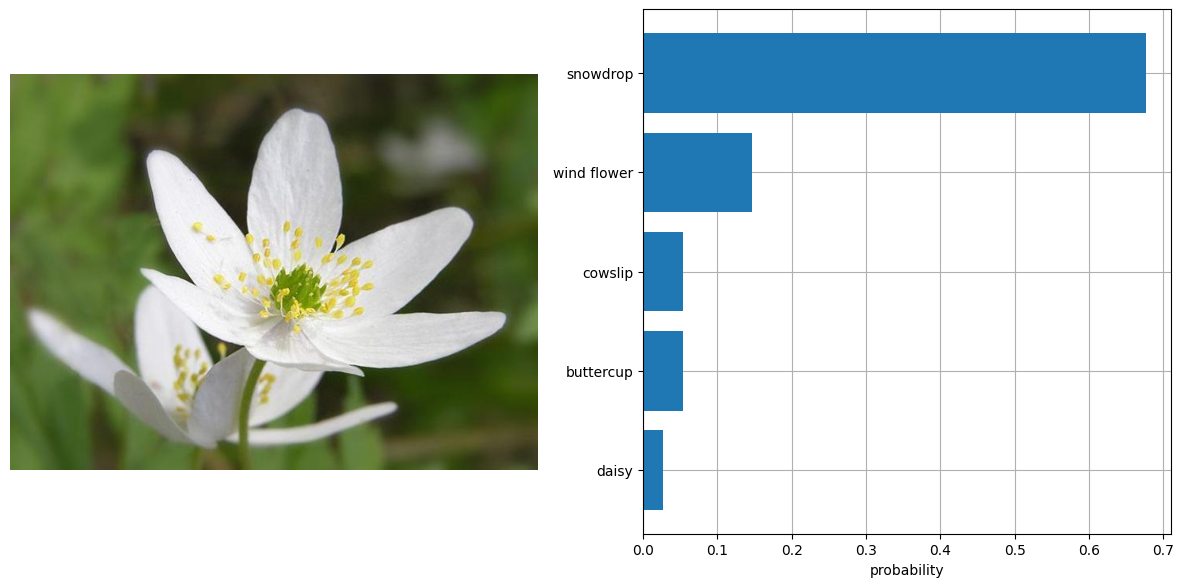

In [7]:
sample_path = Path("data/flower/image_1232.jpg") # use format like image_0001.jpg, image_0011.jpg, image_0111.jpg, and image_1111.jpg
sample_path.parent.mkdir(parents=True, exist_ok=True)
image = Image.open(sample_path)
input_labels = ['daffodil', 'snowdrop', 'lilyValley', 'bluebell', 'crocus', 'iris', 'tigerlily', 'tulip', 'fritillary', 'sunflower', 'daisy', 'colts foot', 'dandelion', 'cowslip', 'buttercup', 'wind flower', 'pansy']
text_descriptions = [f"This is a photo of {label} " for label in input_labels]

inputs = processor(text=text_descriptions, images=[image], return_tensors="pt", padding=True)

results = model(**inputs)
logits_per_image = results['logits_per_image']  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1).detach().numpy()  # we can take the softmax to get the label probabilities
visualize_result(image, input_labels, probs[0])
top_label = np.argsort(-probs)[:min(5, probs.shape[0])][0][0]
